✅ Model Accuracy: 0.9686

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



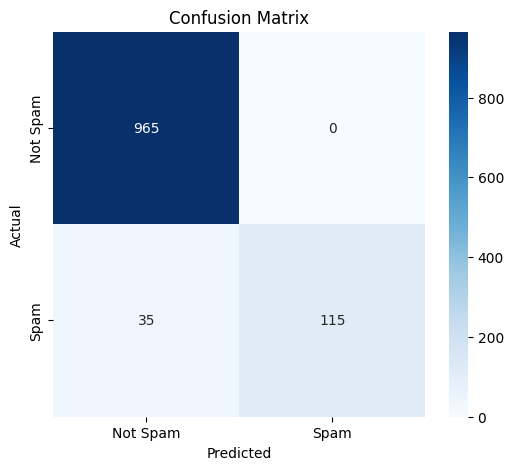


🔍 Example Predictions:
Message: "Congratulations! You won a free lottery, claim now!!!" -> Prediction: ⚠️ Spam!
Message: "Hey, are we still meeting for lunch today?" -> Prediction: ✅ Not Spam
Message: "URGENT! Your account has been suspended, verify now" -> Prediction: ⚠️ Spam!
Message: "Can you send me the notes from yesterday?" -> Prediction: ✅ Not Spam


In [2]:
"""
Mini Project Series - Day 2
Spam Message Classifier using Machine Learning
Author: K. Gayatri
GitHub: https://github.com/Gayatri0925/MINI-PROJECT-SERIES
Description: Classify SMS messages as Spam or Not Spam using Naive Bayes
"""

# -------------------------------
# Step 1: Import Libraries
# -------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# -------------------------------
# Step 2: Load Dataset
# -------------------------------
# Handle different encodings to avoid errors
try:
    df = pd.read_csv("spam.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("spam.csv", encoding='latin-1')

# Select relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# -------------------------------
# Step 3: Preprocess Text
# -------------------------------
def clean_text(text):
    """
    Cleans input text by:
    - converting to lowercase
    - removing numbers
    - removing punctuation
    - stripping whitespace
    """
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

df['message'] = df['message'].apply(clean_text)

# Map labels: 0 = Not Spam (ham), 1 = Spam
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# -------------------------------
# Step 4: Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

# -------------------------------
# Step 5: Feature Extraction (TF-IDF)
# -------------------------------
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# -------------------------------
# Step 6: Model Training
# -------------------------------
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# -------------------------------
# Step 7: Model Evaluation
# -------------------------------
y_pred = model.predict(X_test_vec)

print("✅ Model Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam','Spam'], yticklabels=['Not Spam','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# -------------------------------
# Step 8: Predict Custom Messages
# -------------------------------
def predict_message(message):
    """
    Predicts whether a message is Spam or Not Spam.
    Returns a clear string with an icon.
    """
    cleaned = clean_text(message)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    return "✅ Not Spam" if pred == 0 else "⚠️ Spam!"

# Test examples with clarity
test_messages = [
    "Congratulations! You won a free lottery, claim now!!!",
    "Hey, are we still meeting for lunch today?",
    "URGENT! Your account has been suspended, verify now",
    "Can you send me the notes from yesterday?",
]

print("\n🔍 Example Predictions:")
for msg in test_messages:
    print(f"Message: \"{msg}\" -> Prediction: {predict_message(msg)}")

# -------------------------------
# Step 9: Save Model (Optional)
# -------------------------------
with open("spam_classifier_model.pkl", "wb") as f:
    pickle.dump((vectorizer, model), f)
